In [1]:
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
import statsmodels.formula.api as smf
import numpy as np

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
survey = pd.read_csv(r"C:\Users\Peter\OneDrive\Desktop\Code and Projects\ECO1465\clean survey.csv")

In [4]:
survey

,Unnamed: 0,ResponseId,treatment,matchTreatment,treatIdeo,control,potentialText,primaryOutlets,comply,newLikesNum,tookFollowup,have14DaysPosts,installTwoWeeks,have14DaysLikes,validExtAndShared,validHisOneWeek,minHistoryRelative,maxTimeExt,maxDiffPostsDay,mobile,politicsAd,follow,followAboveMed,thermo_Rep,thermo_Dem,empathy_Rep,empathy_Dem,certain,certainAboveEqMed,selfReportedLikesNum,slant_Rep,slant_Dem,zipReside,registered,personality_1,personality_2,personality_3,personality_4,personality_5,personality_6,personality_7,personality_8,personality_9,personality_10,immigration,daca,immigrationWorry,thermo_Trump,thermo_TrumpHave,thermo_TrumpWM,thermo_Local,mostNews,mostNewsSM,accessWebsites,crtA,crtB,ideoLeaning,ideoLeaningF,startPOSIX,democrat,republican,independent,ideologyN,thermo_Diff,thermo_DiffAboveEqMed,thermo_DiffHave,thermo_DiffWM,age,ageAboveMed,ageHave,ageWM,female,ideologyF,partyAllF,trumpF,genderF,ageSqWM,immigrationWorryF,MuellerFairF,obstructF,repF,absIdeology,empathyDifficult_Diff,empathyDifficult_DiffHave,empathyDifficult_DiffWM,echoChamber,echoChamberAboveEqMed,openessPersonality,openessPersonalityAboveEqMed,seenCounterAnyShare,seenCounterAnyShareAboveEqMed,initialLikesNum,countInitialNewsLikes,countInitialNewsLikesAboveMed,meanInitialSlant,absInitialSlant,postsInitialAccess,absIdeoAboveEqMed,meanSeenAboveMed,meanDistSlantUnderMed,consIdeology,crtScoreAboveEqMed,clickLinks_Mobile,clickLinks_PC,party7,genericBallotF,thermo_Own,thermo_Opposing,empathyDifficult_Own,empathyDifficult_Opposing,objective,voteSupport2016F,ageSq,rosensteinF,Q_SocialSource,askExtension,F_approve,F_approve_ScaleS,F_favorable_McCabe,F_favorable_McCabe_Op_ScaleS,F_favorable_Hogg,F_favorable_Hogg_Op_ScaleS,F_favorable_Mueller,F_favorable_Mueller_Op_ScaleS,F_favorable_Daniels,F_favorable_Daniels_Op_ScaleS,F_favorable_Bolton,F_favorable_Bolton_Op_ScaleS,F_favorable_Pruitt,F_favorable_Pruitt_Op_ScaleS,F_favorable_Cohen,F_favorable_Cohen_Op_ScaleS,F_favorable_Clinton,F_favorable_Clinton_Op_ScaleS,F_favOrg_NRA,F_favOrg_NRA_Op_ScaleS,F_favOrg_March,F_favOrg_March_Op_ScaleS,F_favOrg_California,F_favOrg_California_Op_ScaleS,F_favOrg_FBI,F_favOrg_FBI_Op_ScaleS,F_mccabe_summary,F_mccabe_summary_ScaleS,F_tradeWar,F_tradeWar_Op_ScaleS,F_gunPolicy_Assault,F_gunPolicy_Assault_Op_ScaleS,F_thermo_Trump,F_thermo_Trump_ScaleS,F_favOrg_Immigrants,F_favOrg_Immigrants_Op_ScaleS,F_investigation,F_investigation_Op_ScaleS,F_BN_Obstruct,F_BN_Obstruct_Op_ScaleS,F_partyIdeasDem,F_partyIdeasRep,F_empathy_difficultDem,F_empathy_difficultRep,F_empathy_importantDem,F_empathy_importantRep,F_thermo_Dem,F_thermo_Rep,F_marryDem,F_marryRep,persIndex,persAnderson,persAndersonNoNeg,persAndersonWithMissing,persAndersonNoNegWithMissing,F_thermo_Diff,F_thermo_DiffScale,F_empathyDifficult_Diff,F_empathyDifficult_DiffScale,F_empathyImportant_Diff,F_empathyImportant_DiffScale,F_partyIdeas_Diff,F_partyIdeas_DiffScale,F_marry_Opposing,F_marry_OpposingScale,F_postMod_Like_Pol,F_postMod_Like_PolScale,F_postMod_Share_Pol,F_postMod_Share_PolScale,F_postMod_ShareActual_Pol,F_postMod_ShareActual_PolScale,polAffectiveIndex,polIndexBehavior,polIndexAll,polAffectiveIndexNoMarry,polAffectiveIndexOwn,polAffectiveIndexOpposing,polAffectiveAnderson,polAffectiveAndersonWithMissing,F_heardNews_Clark,F_heardNews_Clinton,F_favorable_Farrakhan_Know,F_favorable_Cohen_Know,F_believeNews_Wall,F_believeNews_Tax,F_believeNews_CriminalTarget,F_believeNews_Influence,F_party7,F_slant_Rep,F_slant_Dem,F_ideology,F_echoChamber,F_whoWillWin,F_vote,F_modifiedViews,F_withoutLastControl,F_startPOSIX,weightPers,weightPol
0,1,R_0006zeOG7m4r5bX,Liberal,Counter,treatLIdeoC,False,"c(""FoxNews"", ""HuffPost"", ""MSNBC"", ""NationalRev...",True,True,4,True,True,0,True,NaN,NaN,NaN,NaN,89.0,1,False,1,False,33.0,33.0,2.0,1.0,2.0,False,4.0,3.0,-3.0,64131,1.0,3.0,5.0,7.0,4.0,7.0,6.0,5.0,1.0,5.0,1.0,NaN,NaN,0.0,1.0,True,1,NaN,8,True,4.0,NaN,47,1.0,conservativeIdeo,2018-03-07 22:28:53,0,1,0,0.0,0.0,False,True,0,40.0,False,True,40,1.0

In [7]:
survey = survey.dropna(subset=["polAffectiveIndex"])
survey

,ideologyF,partyAllF,trumpF,genderF,ageWM,ageSqWM,ageHave,ideoLeaningF,matchTreatment,thermo_DiffWM,thermo_DiffHave,empathyDifficult_DiffHave,empathyDifficult_DiffWM,polAffectiveIndex
0,4. Moderate; middle of the road,Republican,Strongly disapprove,female,40,1600,True,conservativeIdeo,Counter,0,True,True,-1,-1.593928
2,6. Conservative,Lean Republican,Strongly approve,male,69,4761,True,conservativeIdeo,Counter,46,True,True,0,-0.328759
3,2. Liberal,Strong Democrat,Strongly disapprove,female,59,3481,True,liberalIdeo,Control,87,True,True,2,-0.206452
4,2. Liberal,Strong Democrat,Strongly disapprove,male,43,1849,True,liberalIdeo,Control,80,True,True,3,0.657809
5,2. Liberal,Strong Democrat,Strongly disapprove,female,31,961,True,liberalIdeo,Counter,89,True,True,4,0.203449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17630,6. Conservative,Lean Republican,Strongly approve,male,49,2401,True,conservativeIdeo,Pro,5,True,False,0,-1.416956
17631,1. Extremely liberal,Strong Democrat,Strongly disapprove,female,42,1764,True,liberalIdeo,Control,69,True,True,4,1.156575
17632,2. Liberal,Democrat,Strongly disapprove,female,30,900,True,liberalIdeo,Counter,34,True,True,1,-1.053538
17633,2. Liberal,Lean Democrat,Strongly disapprove,female,27,729,True,liberalIdeo,Control,41,True,True,2,0.013279


In [8]:
survey = survey[["ideologyF", "partyAllF", "trumpF", "genderF", "ageWM", "ageSqWM", "ageHave", "ideoLeaningF", "matchTreatment", 
            "thermo_DiffWM", "thermo_DiffHave", "empathyDifficult_DiffHave",
            "empathyDifficult_DiffWM", "polAffectiveIndex"]]

In [60]:
survey.describe()

,ageWM,ageSqWM,thermo_DiffWM,empathyDifficult_DiffWM,polAffectiveIndex
count,16896.000000,16896.000000,16896.000000,16896.000000,16896.000000
mean,47.347420,2622.409209,48.385713,1.897668,-0.025275
std,19.510346,1743.888388,29.805894,1.629233,1.002661
min,0.000000,0.000000,-100.000000,-4.000000,-5.591401
25%,31.000000,961.000000,30.000000,1.000000,-0.721950
50%,51.000000,2601.000000,51.000000,2.000000,-0.014221
75%,64.000000,4096.000000,70.000000,3.000000,0.674286
max,89.000000,7921.000000,100.000000,4.000000,2.319522


In [14]:
survey.describe().to_latex(r"C:\Users\Peter\OneDrive\Desktop\Code and Projects\ECO1465\summary stats.tex",
                           formatters={"name": str.upper},
                           float_format="{:.1f}".format)


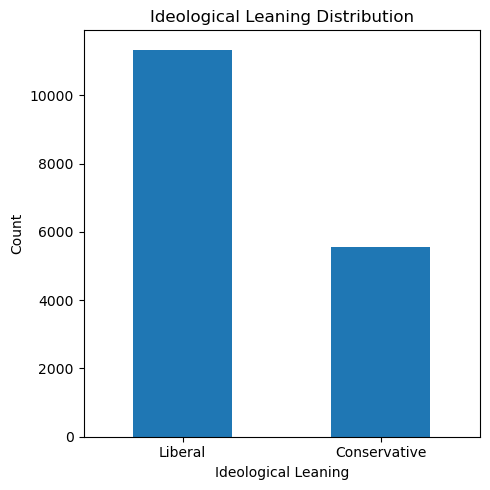

In [49]:
ideo_counts = survey["ideoLeaningF"].value_counts()
fig, ax = plt.subplots(figsize=(5, 5))
ax = ideo_counts.plot(kind="bar")

new_labels = ["Liberal", "Conservative"]
ax.set_xticklabels(new_labels, rotation=0, ha='center')

plt.title('Ideological Leaning Distribution')
plt.xlabel('Ideological Leaning')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

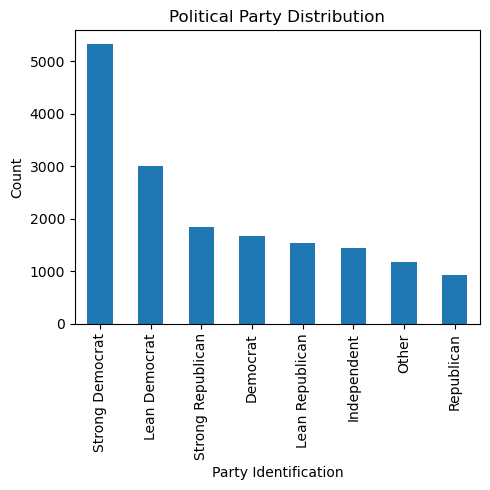

In [ ]:
party_counts = survey["partyAllF"].value_counts()
fig, ax = plt.subplots(figsize=(5, 5))
ax = party_counts.plot(kind="bar")


plt.title('Political Party Distribution')
plt.xlabel('Party Identification')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

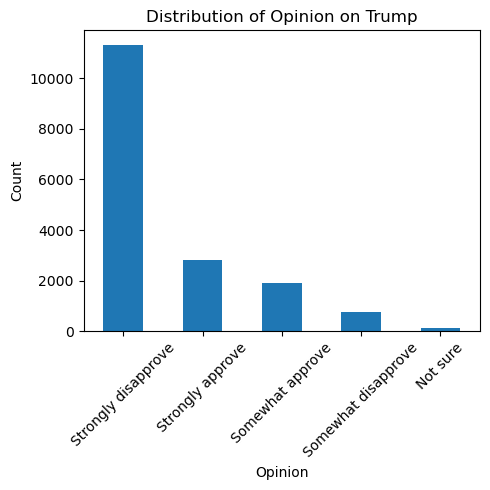

In [54]:
trump_counts = survey["trumpF"].value_counts()
fig, ax = plt.subplots(figsize=(5, 5))
ax = trump_counts.plot(kind="bar")

ax.set_xticklabels(trump_counts.index, rotation=45, ha='center')

plt.title('Distribution of Opinion on Trump')
plt.xlabel('Opinion')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

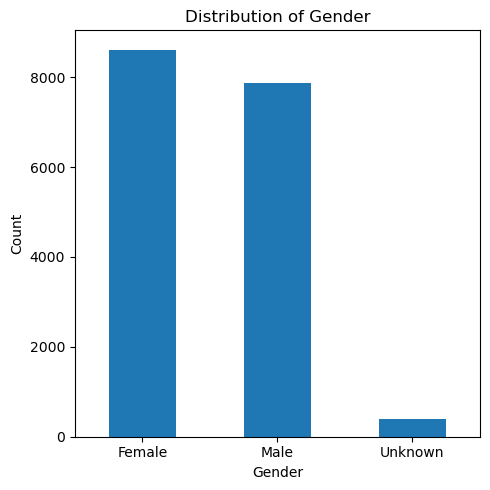

In [56]:
gender_counts = survey["genderF"].value_counts()
fig, ax = plt.subplots(figsize=(5, 5))
ax = gender_counts.plot(kind="bar")

new_labels = ["Female", "Male", "Unknown"]
ax.set_xticklabels(new_labels, rotation=0, ha='center')

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

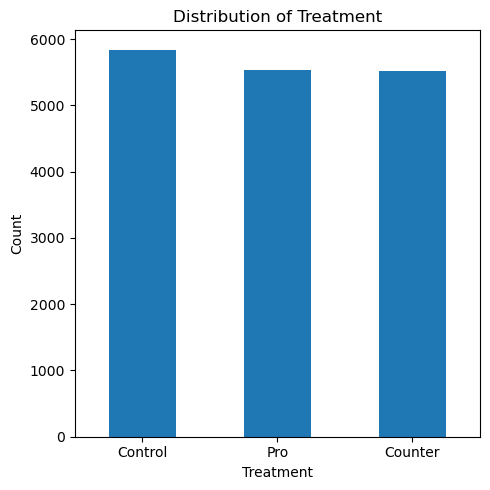

In [58]:
treatment_counts = survey["matchTreatment"].value_counts()
fig, ax = plt.subplots(figsize=(5, 5))
ax = treatment_counts.plot(kind="bar")


ax.set_xticklabels(treatment_counts.index, rotation=0, ha='center')

plt.title('Distribution of Treatment')
plt.xlabel('Treatment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

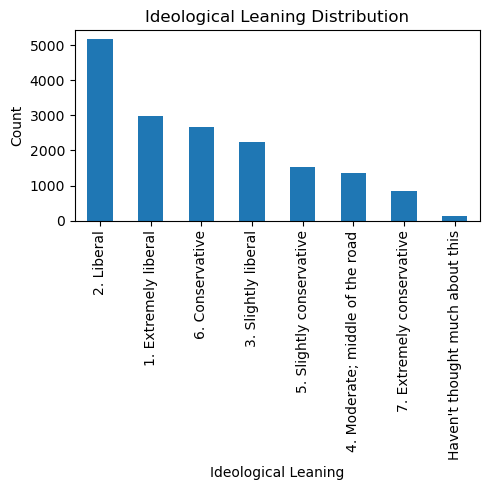

In [67]:
ideol_counts = survey["ideologyF"].value_counts()
fig, ax = plt.subplots(figsize=(5, 5))
ax = ideol_counts.plot(kind="bar")

#new_labels = ["Liberal", "Conservative"]
ax.set_xticklabels(ideol_counts.index, rotation = 90, ha='center')

plt.title('Ideological Leaning Distribution')
plt.xlabel('Ideological Leaning')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [7]:
X = survey[["ideologyF", "partyAllF", "trumpF", "genderF", "ageWM", "ageSqWM", "ageHave", "ideoLeaningF", "matchTreatment", 
            "thermo_DiffWM", "thermo_DiffHave", "empathyDifficult_DiffHave",
            "empathyDifficult_DiffWM"]]
            
Y = survey["polAffectiveIndex"]

In [11]:
model = smf.ols("polAffectiveIndex ~ C(ideologyF) + C(partyAllF) + C(trumpF) + C(genderF) + C(ageHave) + C(ideoLeaningF) + C(matchTreatment) + C(thermo_DiffHave) + C(empathyDifficult_DiffHave) + ageWM + ageSqWM + thermo_DiffWM + empathyDifficult_DiffWM", data=survey).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      polAffectiveIndex   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     771.8
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:00:13   Log-Likelihood:                -16719.
No. Observations:               16896   AIC:                         3.350e+04
Df Residuals:                   16865   BIC:                         3.374e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                           0.2903      0.092      3.151      0.002       0.110       0.471
C(ideologyF)[T.2. Liberal]                         -0.1777      0.015    -11.733      0.000      -0.207      -0.148
C(ideologyF)[T.3. Slightly liberal]                -0.3223      0.019    -16.561      0.000      -0.360      -0.284
C(ideologyF)[T.4. Moderate; middle of the road]    -0.3489      0.025    -14.092      0.000      -0.397      -0.300
C(ideologyF)[T.5. Slightly conservative]           -0.3735      0.034    -11.130      0.000      -0.439      -0.308
C(ideologyF)[T.6. Conservative]                    -0.2509      0.034     -7.299      0.000      -0.318      -0.183
C(ideologyF)[T.7. Extremely conservative]          -0.0054      0.040     -0.135      0.893      -0.084       0.073
C(ideologyF)[T.Haven't thought much about this]    -0.4234      0.061     -6.964      0.000      -0.543      -0.304
C(partyAllF)[T.Independent]                        -0.1219      0.027     -4.490      0.000      -0.175      -0.069
C(partyAllF)[T.Lean Democrat]                       0.0311      0.020      1.556      0.120      -0.008       0.070
C(partyAllF)[T.Lean Republican]                     0.0188      0.035      0.542      0.588      -0.049       0.087
C(partyAllF)[T.Other]                               0.0182      0.028      0.647      0.518      -0.037       0.073
C(partyAllF)[T.Republican]                         -0.0767      0.037     -2.063      0.039      -0.150      -0.004
C(partyAllF)[T.Strong Democrat]                     0.2436      0.019     12.514      0.000       0.205       0.282
C(partyAllF)[T.Strong Republican]                   0.1269      0.035      3.602      0.000       0.058       0.196
C(trumpF)[T.Somewhat approve]                       0.0762      0.064      1.199      0.230      -0.048       0.201
C(trumpF)[T.Somewhat disapprove]                   -0.0678      0.066     -1.031      0.303      -0.197       0.061
C(trumpF)[T.Strongly approve]                       0.3628      0.064      5.684      0.000       0.238       0.488
C(trumpF)[T.Strongly disapprove]                    0.0962      0.064      1.507      0.132      -0.029       0.221
C(genderF)[T.female]                               -0.0150      0.033     -0.450      0.653      -0.080       0.050
C(genderF)[T.male]                                  0.0049      0.033      0.148      0.882      -0.061       0.071
C(ageHave)[T.True]                                 -0.1555      0.049     -3.159      0.002      -0.252      -0.059
C(ideoLeaningF)[T.liberalIdeo]                      0.0612      0.038      1.629      0.103      -0.012       0.135
C(matchTreatment)[T.Counter]                       -0.0276      0.0

In [14]:
print(model.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}                                  & polAffectiveIndex & \textbf{  R-squared:         } &     0.579   \\
\textbf{Model:}                                          &        OLS        & \textbf{  Adj. R-squared:    } &     0.578   \\
\textbf{Method:}                                         &   Least Squares   & \textbf{  F-statistic:       } &     771.8   \\
\textbf{Date:}                                           &  Mon, 22 Sep 2025 & \textbf{  Prob (F-statistic):} &     0.00    \\
\textbf{Time:}                                           &      13:58:49     & \textbf{  Log-Likelihood:    } &   -16719.   \\
\textbf{No. Observations:}                               &        16896      & \textbf{  AIC:               } & 3.350e+04   \\
\textbf{Df Residuals:}                                   &        16865      & \textbf{  BIC:               } & 3.374e+04   \\
\textbf{Df Model:}                                       &       